In [159]:
# installing the modules we will use (run it only the first time)
#! pip install pydataset
#! pip install matplotlib
#! pip install pandas
#! pip install seaborn

In [47]:
# Before we start with matplotlib we will need some data to plot, let's import example dataframes
from pydataset import data
swiss = data('swiss')
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [392]:
economics = data('economics')
economics[['date','unemploy']].tail()

,date,unemploy
474,2006-11-30,6849
475,2006-12-31,7017
476,2007-01-31,6865
477,2007-02-28,6724
478,2007-03-31,6801


In [530]:
mammals = data('mammals').sort_values("body",ascending=False).head(10)
mammals['brain_to_body_ratio']=mammals.brain/mammals.body
mammals.head()

,body,brain,brain_to_body_ratio
African elephant,6654.0,5712.0,0.858431
Asian elephant,2547.0,4603.0,1.807224
Giraffe,529.0,680.0,1.285444
Horse,521.0,655.0,1.257198
Cow,465.0,423.0,0.909677


In [679]:
iris = data('iris')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [1]:
# MATPLOTLIB
# matplotlib is a library to create visualizations
# pyplot is an interface to simplify the creation of plots with matplotlib

import matplotlib.pyplot as plt # importing pyplot is as plt is a very common convention

In [ ]:
# BASIC RULES OF PLOTTING
# Avoid plot overcrowding. People seeing your slides must understand what you mean in 2 seconds max
# To do this remove anything on the plot that is not necessary and highlight what matters

<ipython-input-121-821621f853f2>:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(x_ticks_labels_modified, rotation = 45, ha="center") # set the labels with a 45 degrees rotation


<Figure size 432x288 with 0 Axes>

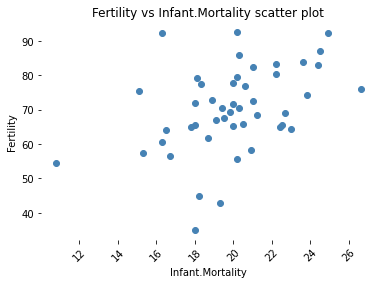

In [121]:
# CREATE A BASIC SCATTER PLOT WITH PLT

plt.clf() # this command is hear to clear any previous plot. when something doesn't make sense on your plot,
#use that, it may be settings of your previous plot interfering

# We start by creating 2 objects: fig and axes
# fig is the figure, a container that will host 1 or more plots.
# axes is the collection of plots that will be displayed on fig.
# it's called axes and not plots because 1 plot is made of axes (x axis and y axis). 

fig, axes = plt.subplots() # here the axes object will contain only 1 plot

# now let's plot some data

df = swiss.copy() #if you don't use .copy(), python will think that df is swiss, and any modification you make to df
# will also be made to swiss, which is confusing, so whatch out

x_axis = 'Infant.Mortality'
y_axis = 'Fertility'

axes.scatter(x=df[x_axis], y=df[y_axis], color="steelblue", marker ='o')

# Set a title
axes.set_title(y_axis+" vs "+x_axis+" scatter plot")

# set x and y axes labels
axes.set_ylabel(y_axis)
axes.set_xlabel(x_axis)


# hide the frame around the plot, to avoid overcrowding 
for position in axes.spines.keys():
  axes.spines[position].set_visible(False)

# rotate the x ticks labels
x_ticks_labels = axes.get_xticks() # retrieve the ticks labels
x_ticks_labels_modified = [int(x) for x in x_ticks_labels] # turn labels into integers (otherwise they become floats for some reasons)
axes.set_xticklabels(x_ticks_labels_modified, rotation = 45, ha="center") # set the labels with a 45 degrees rotation

# save the file. useful if you then want to integrate it in an html code and/or make a pdf out of it
plt.savefig("fig.png",bbox_inches='tight') # the figure will be save as a png file in your repository
plt.show()

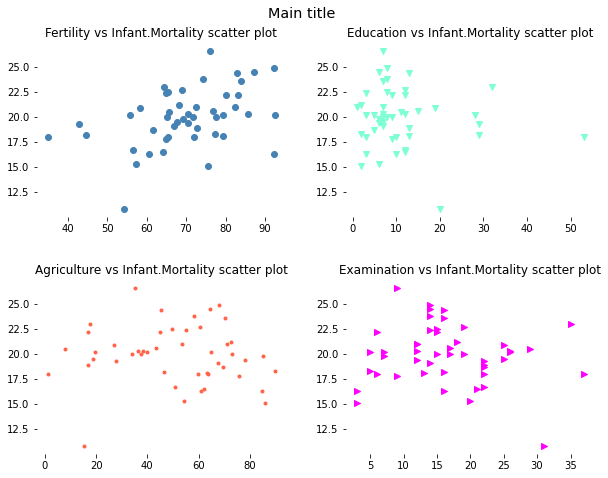

In [134]:
# CREATE A MULTIPLE PLOTS FIGURE WITH PLT

# Here we create 4 plots that will be arranged on 2 rows and 2 columns.
# We use figsize to increase the figure size and leave enough space for all plots. The first number is the 
# width, the second is the height. The default values are: (6.4,4.8)
fig, axes = plt.subplots(2,2, figsize=(9,7)) 


# We access each plot in the object axes using indexing. in our case axes has 2 plots on 2 rows, so we 
# need 2 indices to identify the plot: one for the row, one for the column: axes[0,0] would be the top 
# left plot, axes[0,1] the top right plot, axes[1,0] the bottom left plot and axes[1,1] the bottom right plot.
# Note that if we have only 1 row or one column, for example with plt.subplots(1,2), then only one index is 
# needed, and we would simply use, for example for the first plot: axes[0]

# now let's plot some data
axes[0,0].scatter(x=swiss.Fertility, y=swiss['Infant.Mortality'], color="steelblue", marker ='o')
axes[0,1].scatter(x=swiss.Education, y=swiss['Infant.Mortality'], color="aquamarine", marker='v')
axes[1,0].scatter(x=swiss.Agriculture, y=swiss['Infant.Mortality'], color="tomato", marker ='.')
axes[1,1].scatter(x=swiss.Examination, y=swiss['Infant.Mortality'], color="fuchsia", marker='>')


# Set a title for each subplot
axes[0,0].set_title("Fertility vs "+x_axis+" scatter plot")
axes[0,1].set_title("Education vs "+x_axis+" scatter plot")
axes[1,0].set_title("Agriculture vs "+x_axis+" scatter plot")
axes[1,1].set_title("Examination vs "+x_axis+" scatter plot")

# hide frames
for position in axes[0,0].spines.keys():
  axes[0,0].spines[position].set_visible(False)
  axes[0,1].spines[position].set_visible(False)
  axes[1,0].spines[position].set_visible(False)
  axes[1,1].spines[position].set_visible(False)

# add space between subplots
fig.tight_layout(pad=3.0) #default padding is 1.08

# add title to the whole figure
fig.suptitle('Main title', size='x-large') # default title size is 'large'

plt.show()

<Figure size 432x288 with 0 Axes>

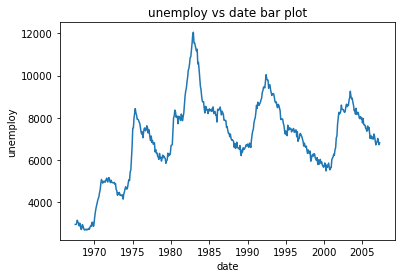

In [408]:
# MAKE A PLOT LINE

plt.clf()

fig, axes = plt.subplots()

# make sure that python knows that the date is a date
economics['date'] = pd.to_datetime(economics.date)

df = economics.copy()

x_axis = 'date'
y_axis = 'unemploy'

axes.plot(df[x_axis], df[y_axis])

# Set a title
axes.set_title(y_axis+" vs "+x_axis+" bar plot")

# set x and y axes labels
axes.set_ylabel(y_axis)
axes.set_xlabel(x_axis)

# save the file. useful if you then want to integrate it in an html code and/or make a pdf out of it
plt.savefig("fig.png",bbox_inches='tight') # the figure will be save as a png file in your repository
plt.show()

number of days:  14519


<Figure size 432x288 with 0 Axes>

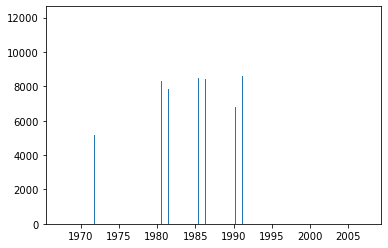

In [504]:
# MAKE A BARPLOT - the problem of the width

plt.clf()

# Lines are often reserved to represent ratios, and bars to represent amounts, so we could also have to use 
# a bar plot
fig, axes = plt.subplots()

# The default width in a bar plot is 0.8, it is expressed 'data' units. Here we have dates, so the unit is days.
ndays = (economics['date'].max() -  economics['date'].min()).days
print("number of days: ",ndays)

# We have 14519 days, so the default width will be 0.8/14519 = 0.000055100213
# That's 0.0055100213 % of the x axis' width. It's too narrow to be displayed well.
# Very few bars, if any, are appearing

axes.bar(economics['date'], economics['unemploy'])
plt.show()

<Figure size 432x288 with 0 Axes>

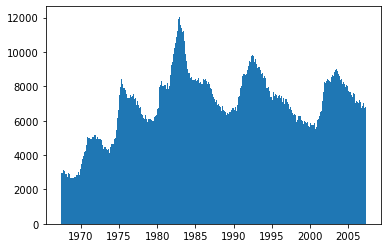

In [506]:
# MAKE A BARPLOT - the solution modifying the width
plt.clf()

fig, axes = plt.subplots()

# Let's pass a width that will cover a full month (31 units of data)

axes.bar(economics['date'], economics['unemploy'],width=31)

plt.show()

<Figure size 432x288 with 0 Axes>

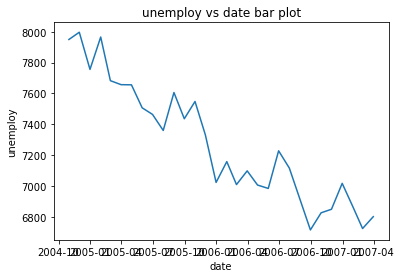

In [508]:
# DATE AXIS: the problem

plt.clf()

# matplotlib sometimes doesn't display the date in the best way

fig, axes = plt.subplots()

df = economics.copy().tail(30)

x_axis = 'date'
y_axis = 'unemploy'

axes.plot(df[x_axis], df[y_axis])

# Set a title
axes.set_title(y_axis+" vs "+x_axis+" bar plot")

# set x and y axes labels
axes.set_ylabel(y_axis)
axes.set_xlabel(x_axis)
plt.show()

date labels in matplotlib are numbers:  [12692. 12784. 12874. 12965. 13057. 13149. 13239. 13330. 13422. 13514.
 13604.]


<ipython-input-502-a694416af76f>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(ticklabels, rotation = 45, ha="center")


<Figure size 432x288 with 0 Axes>

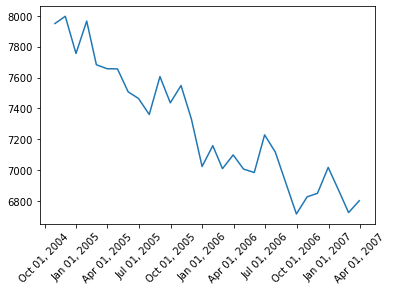

In [502]:
# CUSTOMIZE A DATE AXIS: the solution

plt.clf()

fig, axes = plt.subplots()
axes.plot(df[x_axis], df[y_axis])

x_ticks_labels = axes.get_xticks() # extract the a axis ticks labels
print("date labels in matplotlib are numbers: ",x_ticks_labels)
# these labels are not dates because matplotlib turns dates into number in the background, so let's change
# them back to dates:

import matplotlib.dates as mdates 
x_ticks_labels_dates = mdates.num2date(x_ticks_labels)

# Now we can format them. The default, with this many dates, shows only the year and month, as numbers. 
# Let's add the day (%d) and show the month as text (%b), just for the example
ticklabels = [item.strftime('%b %d, %Y') for item in x_ticks_labels_dates]
# And let's replace the labels on the plot
axes.set_xticklabels(ticklabels, rotation = 45, ha="center")
plt.show()

# Here's the full list of dates format: https://www.programiz.com/python-programming/datetime/strftime

<ipython-input-595-952945ef06a0>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(axes.get_xticklabels(), rotation=45, ha='right')


<Figure size 432x288 with 0 Axes>

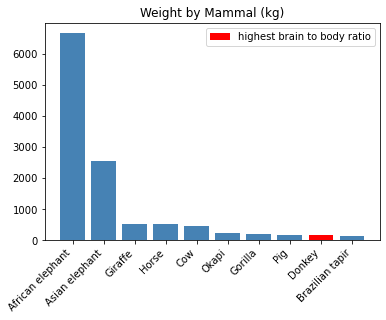

In [595]:
plt.clf()

# HIGHLIGHT 1 DATA POINT
fig, axes = plt.subplots() 

# First let's plot every animal's weight with a soft color
axes.bar(x=mammals.index, height=mammals.body, color = 'steelblue')

# Now let's plot over the previous plot only the datapoint we want to highlight with a bright color
donkey = mammals[mammals.index=='Donkey']
axes.bar(x=donkey.index, height=donkey.body, color = 'red', label="highest brain to body ratio") #let's use a label
axes.legend() # and let's add a legend to display the label

# Set a title
axes.set_title("Weight by Mammal (kg)")

# Rotate the ticks labels
plt.draw() # The tick labels are not populated until the figure is drawn so the method axes.get_xticklabels() 
# would return only the positions of the ticks and not the mammals names if we didn't run first plt.draw!
axes.set_xticklabels(axes.get_xticklabels(), rotation=45, ha='right')
plt.show()

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species size_bins
1           5.1          3.5           1.4          0.2  setosa      56.0
2           4.9          3.0           1.4          0.2  setosa      56.0
3           4.7          3.2           1.3          0.2  setosa      56.0
4           4.6          3.1           1.5          0.2  setosa      56.0
5           5.0          3.6           1.4          0.2  setosa      56.0


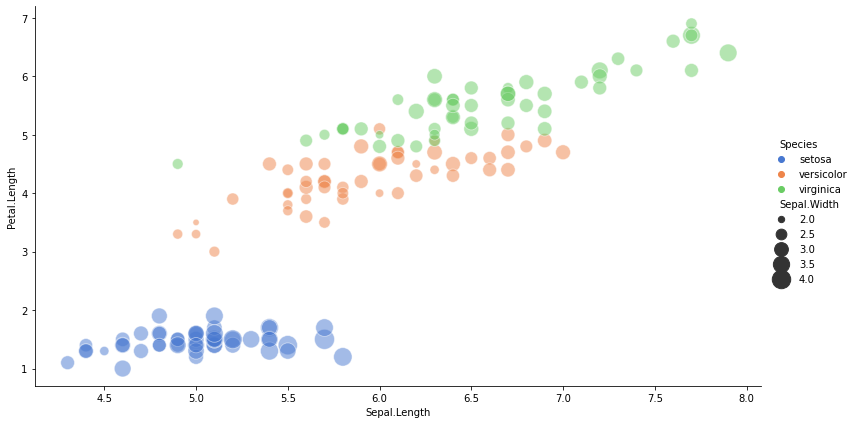

In [714]:
# SHOW MORE THAN 3 DIMENSIONS WITH SEABORN

# the iris dataset has 5 dimensiond
print(iris.head())

# How do we plot as many as possible?
x_axis = 'Sepal.Length'
y_axis = 'Petal.Length'
sizes_column = 'Sepal.Width'
colors_column = 'Species'

import seaborn as sns

sns.relplot(x=x_axis, y=y_axis, hue=colors_column, size=sizes_column,
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, aspect = 1.8, data=iris)

In [ ]:
# RULES OF PLOTTING

# Keep a high data-ink ratio: avoid unnecessary:
# Use of 3D effects, Background images, Shadow effects, Unnecessary borders, and Unnecessary grid lines. 

# Remove shadow effects
# Remove chart junk
# Remove the background
# Remove redundant labels
# Remove unnecessary borders and grid lines
# Reduce colors
# Remove the special effects of word bubbles
# Remove bolding or using font to communicate information
# Less is more effective: simpler titles and labels
# Keep in mind the data density

In [ ]:
# RULES OF USING COLORS

# 1. Use color only when needed to serve a particular communication goal.
# 2. Use different colors only when they correspond to differences of meaning in the data.
# 3. Use soft, natural colors to display most information and bright and/or dark colors to highlight 
# information that requires greater attention
# 4. Non-data components of tables and graphs should be displayed just visibly enough to perform their role, 
# but no more so, for excessive salience could cause them to distract attention from the data.

# If you like this topic, here's the reference: 
# http://www.perceptualedge.com/articles/visual_business_intelligence/rules_for_using_color.pdf